In [71]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [72]:
imagenes = [
    "../imagenes/blancoNegro.png",
    "../imagenes/cameraman.jpg",
    "../imagenes/figuraV.png",
    "../imagenes/figuraV2.jpg",
    "../imagenes/figures.jpg",
    "../imagenes/gato1.jpg",
    "../imagenes/lena.png",
    "../imagenes/mandrill.jpg",
    "../imagenes/ninioB.png",
    "../imagenes/patrones1.jpg",
    "../imagenes/riceB.png"
]

In [104]:
# Tamaño del filtro 3x3, 5x5, 7x7, 9x9
size_filter = 11

In [105]:
def filtro_media(imagen, size):
    filas, columnas = imagen.shape
    salida = np.zeros_like(imagen)
    offset = size // 2

    # Crear filtro de media como lista de listas
    filtro = [[1 / (size * size) for _ in range(size)] for _ in range(size)]

    for i in range(offset, filas - offset):
        for j in range(offset, columnas - offset):
            suma = 0.0
            for m in range(size):
                for n in range(size):
                    fila = i + m - offset
                    col = j + n - offset
                    suma += imagen[fila][col] * filtro[m][n]
            salida[i][j] = int(suma)

    return salida


In [106]:
# Filtro de mediana
def filtro_mediana(imagen, size):
    filas, columnas = imagen.shape
    salida = np.zeros_like(imagen)
    offset = size // 2

    for i in range(offset, filas - offset):
        for j in range(offset, columnas - offset):
            vecindario = [
                [imagen[i + m][j + n] for n in range(-offset, offset + 1)]
                for m in range(-offset, offset + 1)
            ]
            valores = sorted([pix for fila in vecindario for pix in fila])
            salida[i][j] = valores[len(valores) // 2]

    return salida

[[172  10 127 140  47 170 196 151 117 166]
 [ 22 183 192 204  33 216  67 179  78 154]
 [251  82 162 219 195 118 125 139 103 125]
 [229 216   9 164 116 108 211 222 161 159]
 [ 21  81  89 165 242 214 102  98  36 183]
 [  5 112  87  58  43  76  70  60  75 228]
 [216 189 132  14  88 154 178 246 140 205]
 [204  69  58  57  41  98 193  66  72 122]
 [230 125 174 202  39  74 234 207  87 168]
 [101 135 174 200 223 122  88  94 107 145]]

Resultado del filtro de media:
[[0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]]

Resultado del filtro de mediana:
[[0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]]


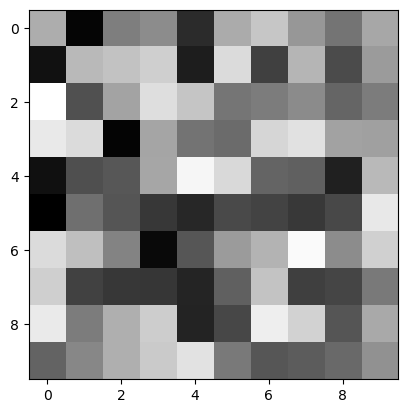

In [107]:
# Test de funciones
np.random.seed(0)
imagen_prueba = np.random.randint(0, 256, size=(10, 10), dtype=np.uint8) 
# Mostrar imagen prueba
plt.imshow(imagen_prueba, cmap='gray')
print(imagen_prueba)
# Aplicar filtros
media_test = filtro_media(imagen_prueba, size_filter)
mediana_test = filtro_mediana(imagen_prueba, size_filter)
# Mostrar resultados como texto
print("\nResultado del filtro de media:")
print(media_test)

print("\nResultado del filtro de mediana:")
print(mediana_test)

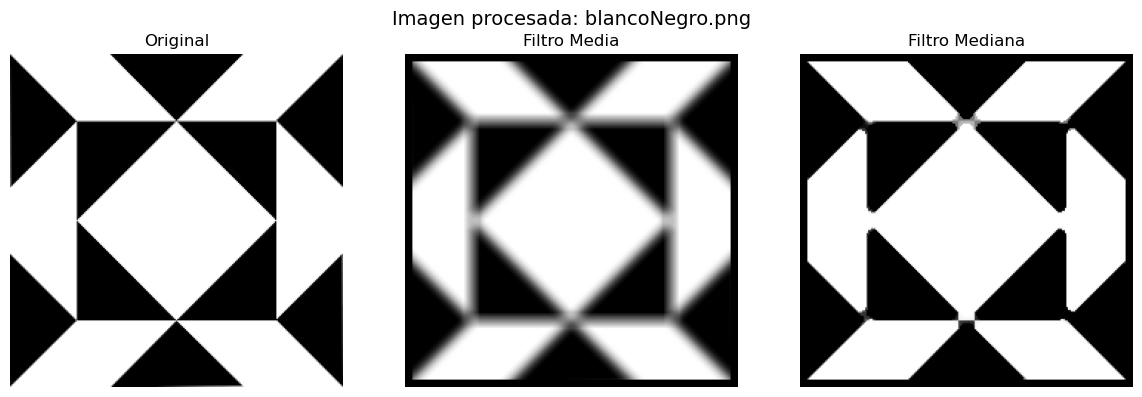

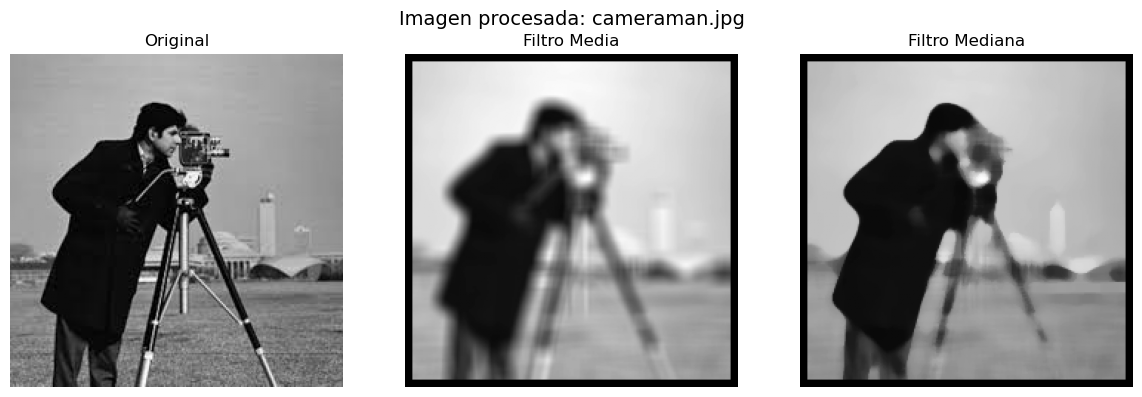

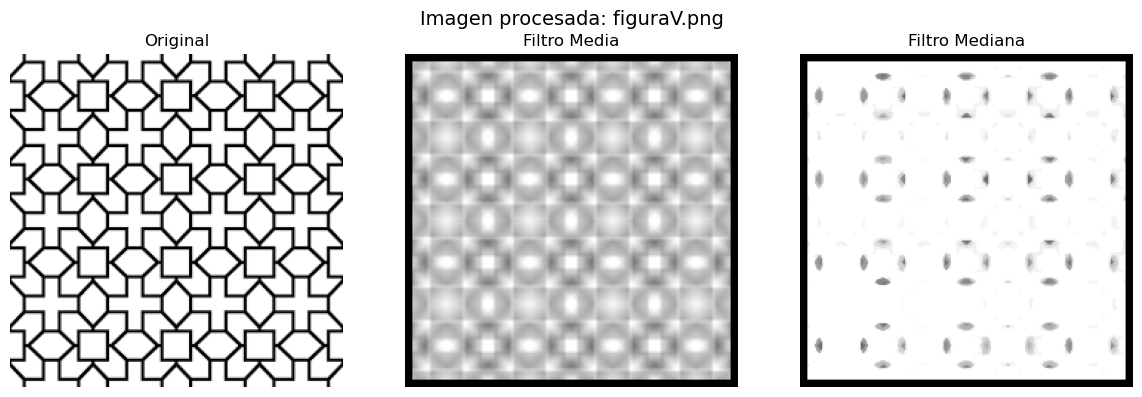

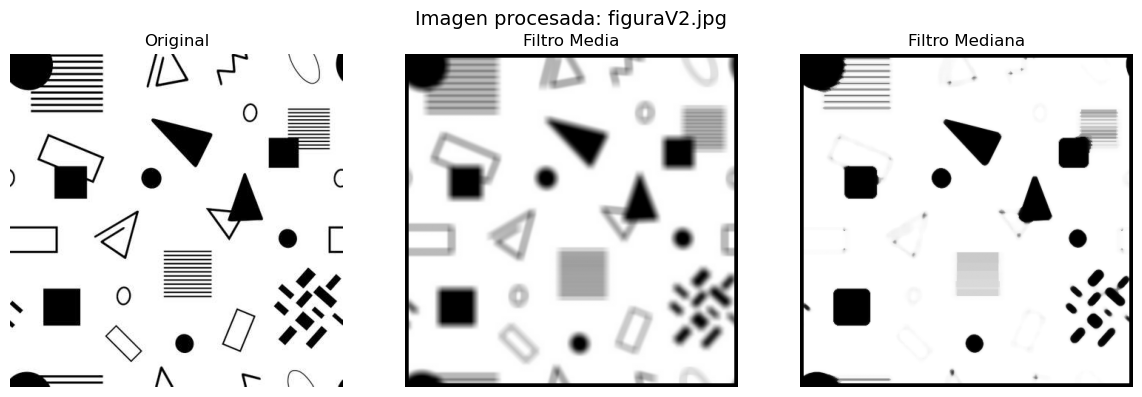

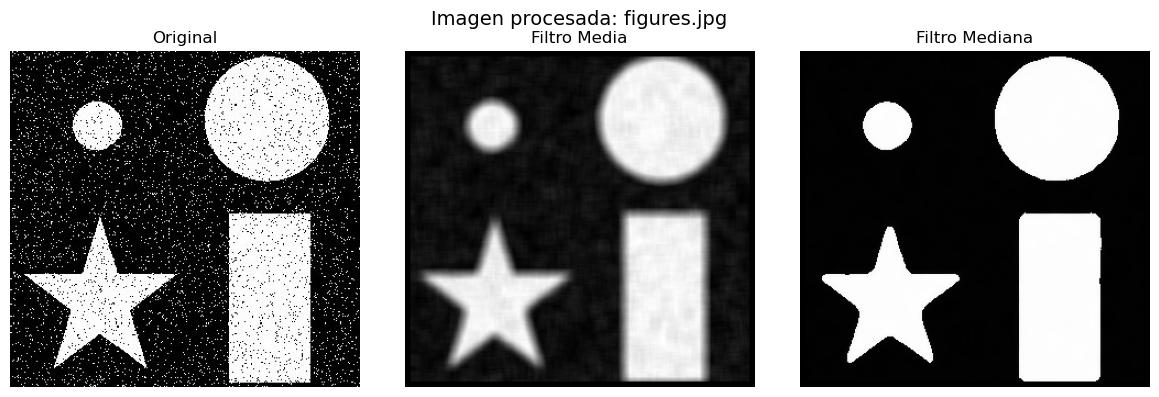

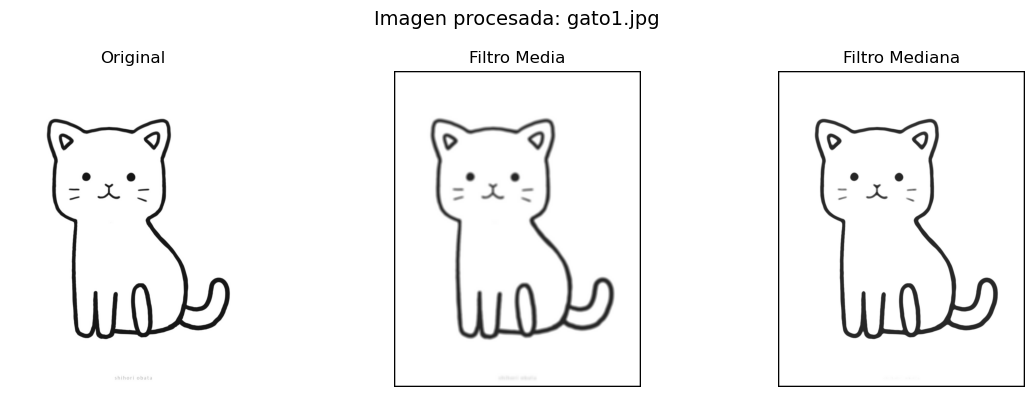

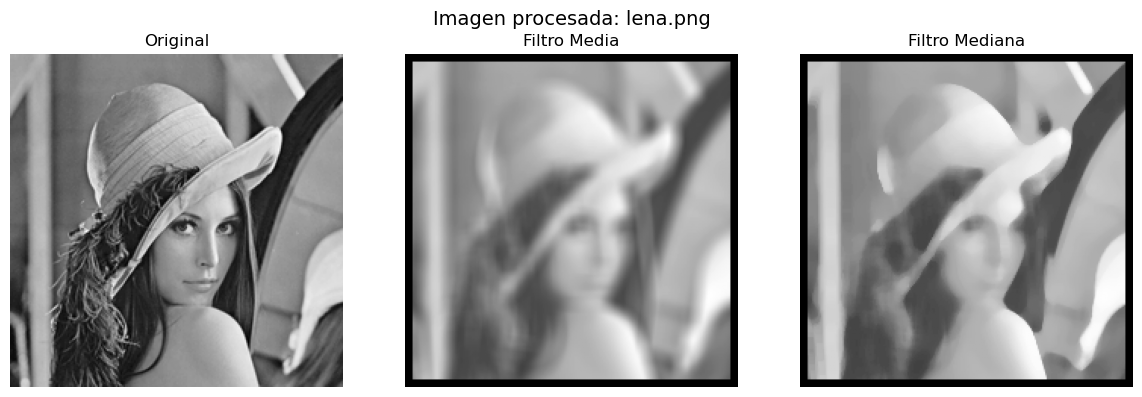

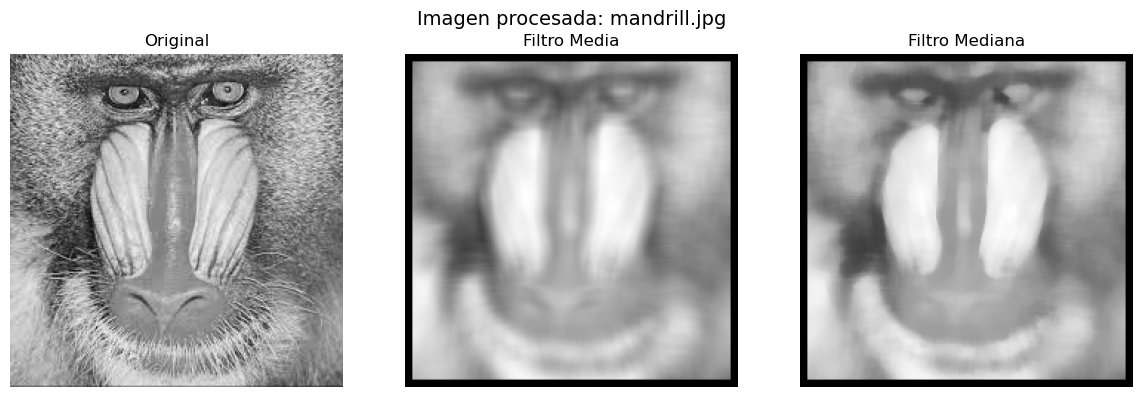

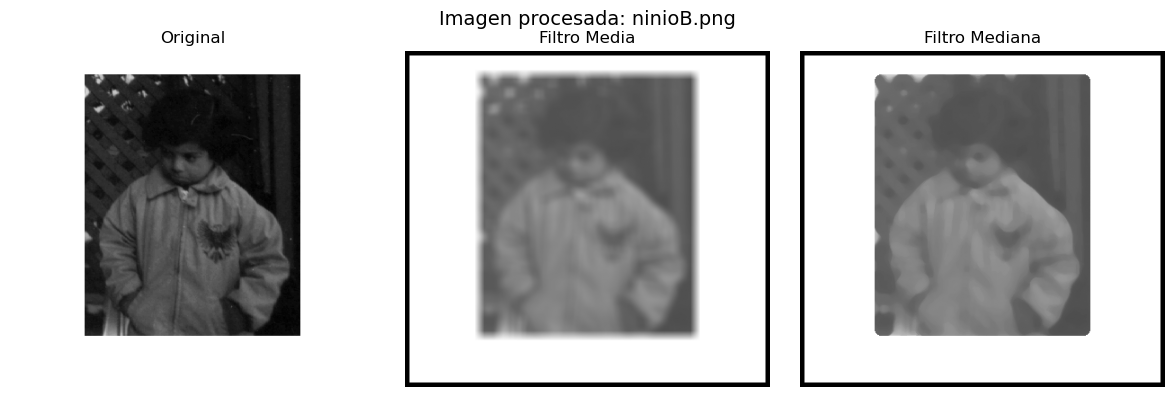

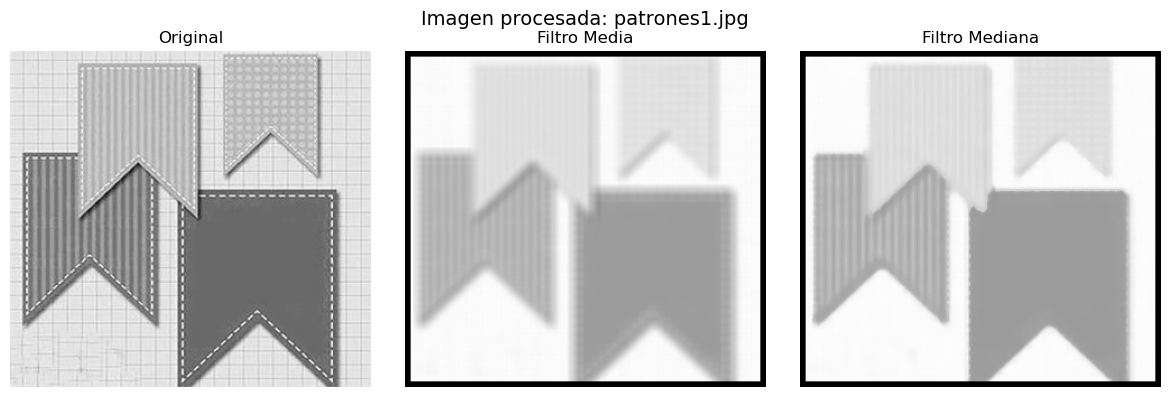

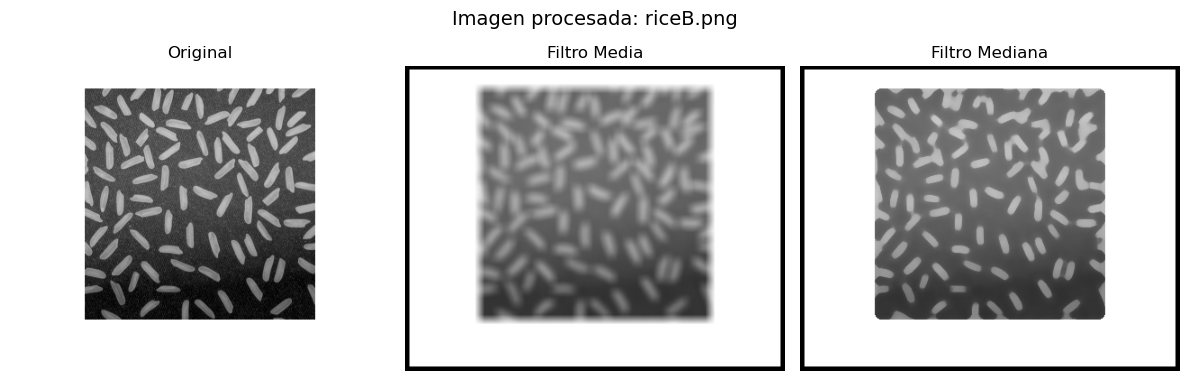

In [108]:
# Parte 3: Procesar y visualizar todas las imágenes

for path in imagenes:
    imagen = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    if imagen is None:
        print(f"No se pudo leer: {path}")
        continue

    media_img = filtro_media(imagen, size_filter)
    mediana_img = filtro_mediana(imagen, size_filter)

    plt.figure(figsize=(12, 4))
    plt.suptitle(f"Imagen procesada: {path[12:]}", fontsize=14)

    plt.subplot(1, 3, 1)
    plt.title('Original')
    plt.imshow(imagen, cmap='gray')
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.title('Filtro Media')
    plt.imshow(media_img, cmap='gray')
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.title('Filtro Mediana')
    plt.imshow(mediana_img, cmap='gray')
    plt.axis('off')

    plt.tight_layout()
    plt.show()


In [131]:
def convolucion(imagen, filter):
    # Convertir imagen a int32 para permitir valores negativos
    imagen = imagen.astype(np.int32)
    filas, columnas = imagen.shape
    f_size = len(filter)
    offset = f_size // 2

    salida = np.zeros_like(imagen, dtype=np.int32)

    for i in range(filas):
        for j in range(columnas):
            # Copiar directamente los bordes
            if i < offset or i >= filas - offset or j < offset or j >= columnas - offset:
                salida[i, j] = imagen[i, j]
            else:
                suma = 0
                for m in range(f_size):
                    for n in range(f_size):
                        fila = i + m - offset
                        col = j + n - offset
                        suma += imagen[fila, col] * filter[m][n]
                salida[i, j] = suma

    # Normalizar al rango 0–255
    salida = np.clip(salida, 0, 255).astype(np.uint8)
    return salida


In [136]:
# Filtro Sobel vertical (detecta bordes horizontales)
filter = [
    [-1, -2, -1],
    [ 0,  0,  0],
    [ 1,  2,  1]
]

# Imagen de prueba aleatoria
np.random.seed(0)
imagen_prueba = np.random.randint(0, 256, size=(10, 10), dtype=np.uint8)
print(imagen_prueba)

[[172  10 127 140  47 170 196 151 117 166]
 [ 22 183 192 204  33 216  67 179  78 154]
 [251  82 162 219 195 118 125 139 103 125]
 [229 216   9 164 116 108 211 222 161 159]
 [ 21  81  89 165 242 214 102  98  36 183]
 [  5 112  87  58  43  76  70  60  75 228]
 [216 189 132  14  88 154 178 246 140 205]
 [204  69  58  57  41  98 193  66  72 122]
 [230 125 174 202  39  74 234 207  87 168]
 [101 135 174 200 223 122  88  94 107 145]]


In [137]:
resultado = convolucion(imagen_prueba, filter)

In [138]:
print(resultado)

[[172  10 127 140  47 170 196 151 117 166]
 [ 22 255 221 255 255   0   0   0   0 154]
 [251  90   0   0  18  11 223 255 214 125]
 [229   0   0   0 136 216   9   0   0 159]
 [ 21   0   0   0   0   0   0   0   0 183]
 [  5 255  43   0   0   0 240 255 255 228]
 [216  84   0   0  17 165 255 132   0 205]
 [204   0 208 255  10   0   0   0   0 122]
 [230 145 255 255 255 125   0   0 121 168]
 [101 135 174 200 223 122  88  94 107 145]]


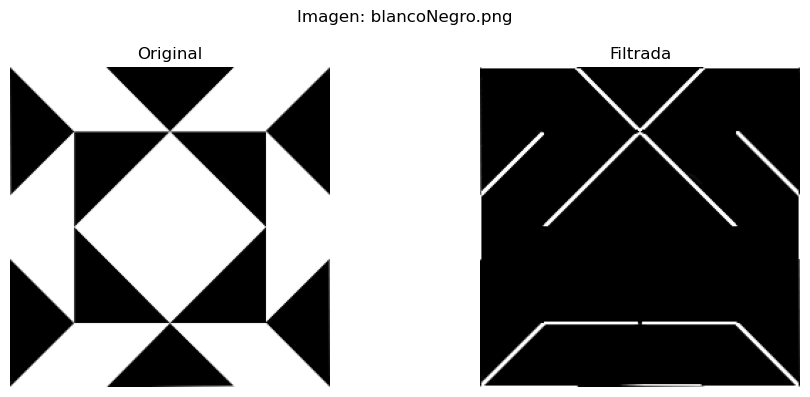

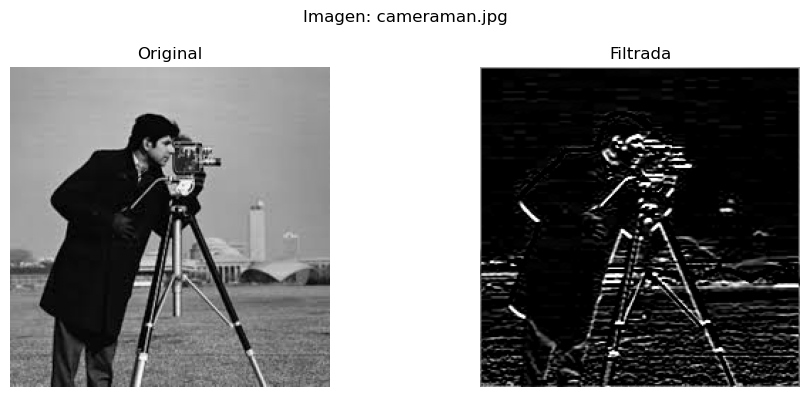

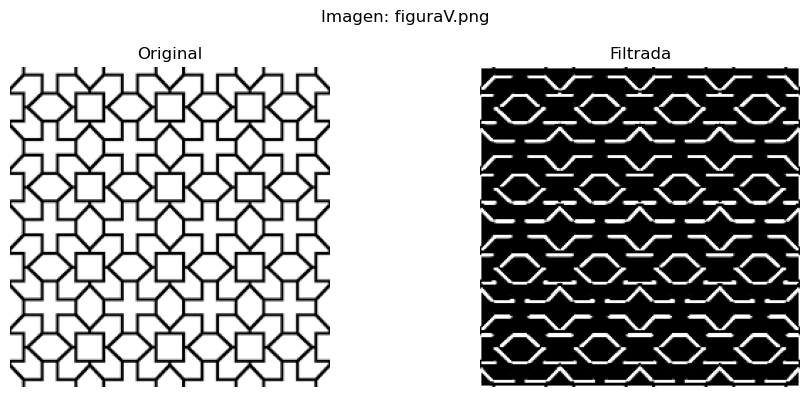

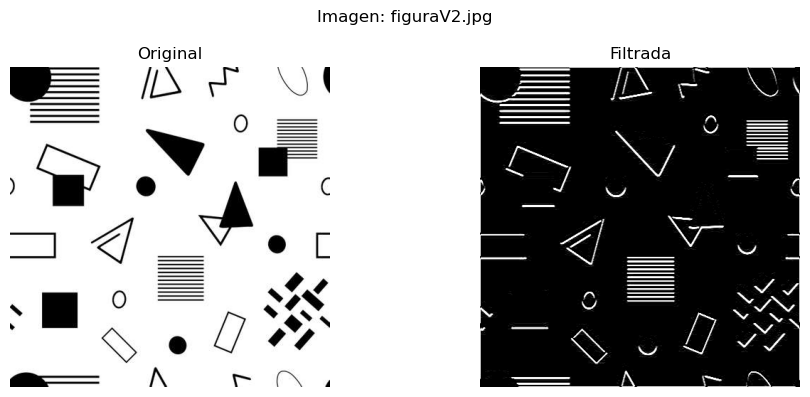

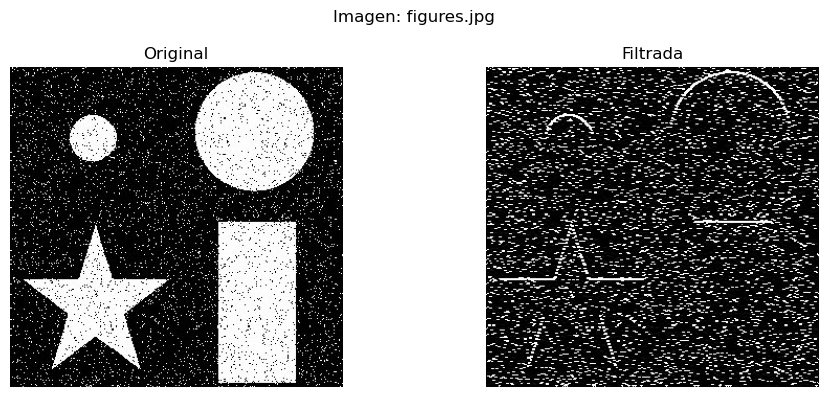

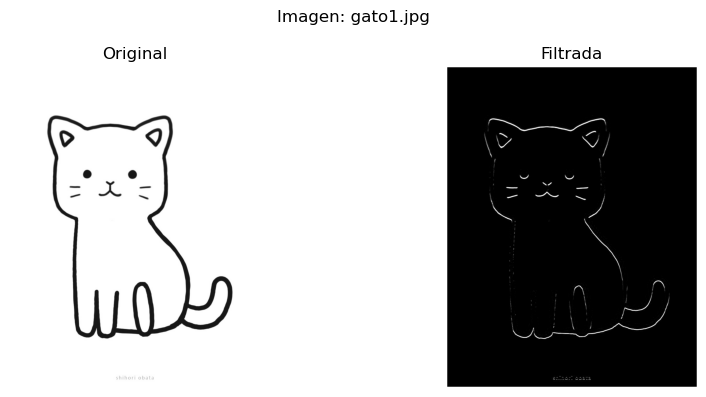

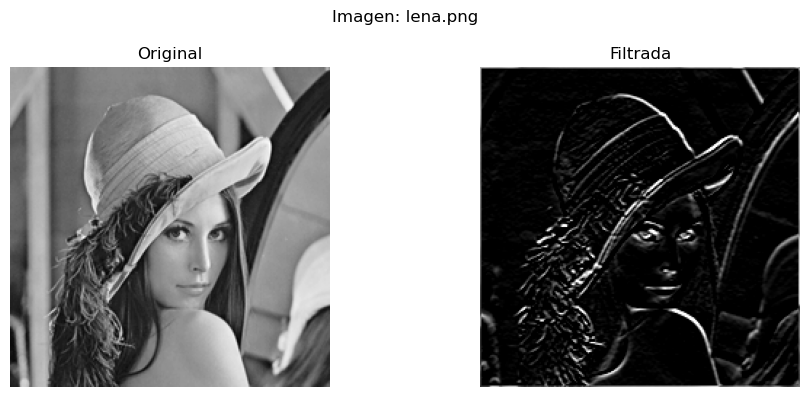

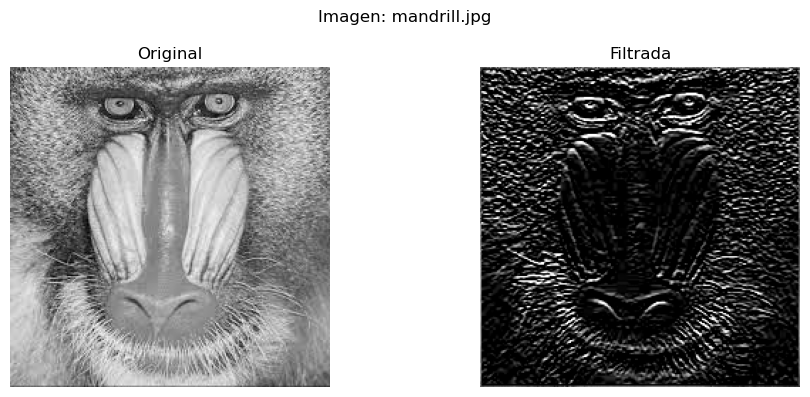

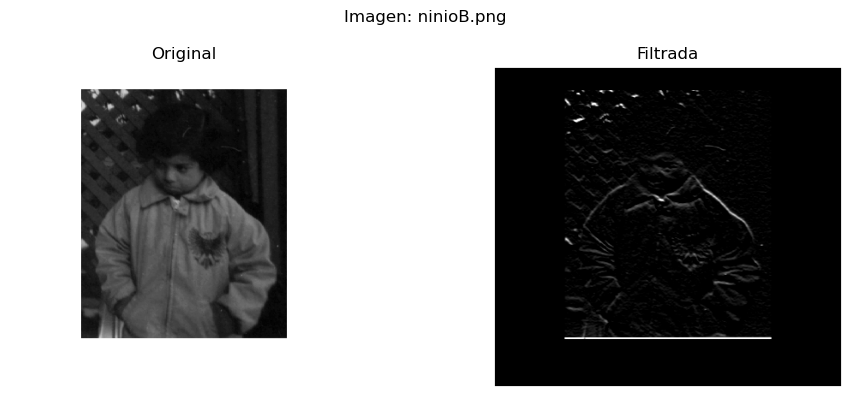

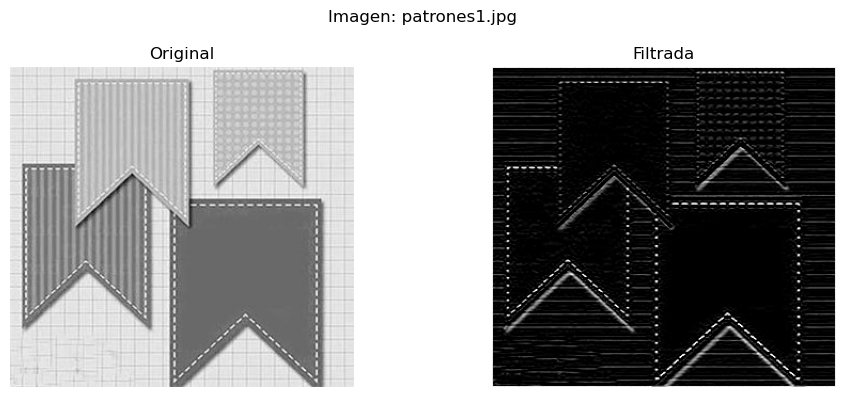

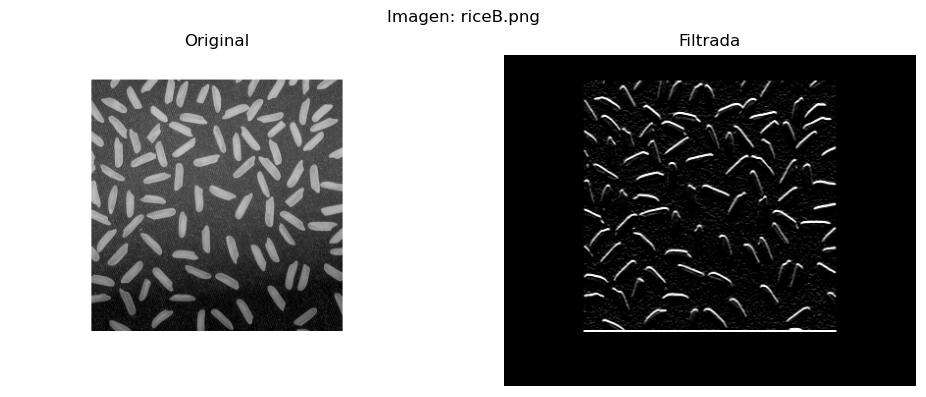

In [141]:
# Procesar y mostrar
for ruta in imagenes:
    imagen = cv2.imread(ruta, cv2.IMREAD_GRAYSCALE)
    if imagen is None:
        print(f"No se pudo cargar: {ruta}")
        continue

    resultado = convolucion(imagen, filter)

    # Mostrar original y filtrada
    plt.figure(figsize=(10, 4))
    plt.suptitle(f"Imagen: {ruta[12:]}", fontsize=12)

    plt.subplot(1, 2, 1)
    plt.title("Original")
    plt.imshow(imagen, cmap='gray')
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.title("Filtrada")
    plt.imshow(resultado, cmap='gray')
    plt.axis("off")

    plt.tight_layout()
    plt.show()
